In [68]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.metrics import auc


# Background Lecture 1
## 1.4.2 exercise 1

prior: $P(T) = \mathcal{N}(T; 37^o, (4^o)^2) $
error distribution: $P(h | T) = \mathcal{N}(ah; T, (1\text{mm})^2)$

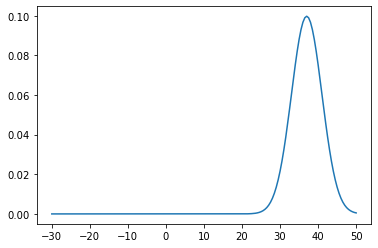

In [69]:
def pdf(x, mu, sigma):
    return np.exp(-(1/2)*((x-mu)/sigma)**2)/(sigma * np.sqrt(2 * np.pi))

mu = 37
sigma = 4
d_t = 0.5
    
x_range = np.arange(-30, 50.5, d_t)
prior = pdf(x_range, mu, sigma)
plt.plot(x_range, prior)


Let's use a std of 1 mm rather than 0.01


$$ p(h) \approx \sum_{m}p(h|T)p(T)\Delta t $$

In [80]:
39 - x_range 

array([ 69. ,  68.5,  68. ,  67.5,  67. ,  66.5,  66. ,  65.5,  65. ,
        64.5,  64. ,  63.5,  63. ,  62.5,  62. ,  61.5,  61. ,  60.5,
        60. ,  59.5,  59. ,  58.5,  58. ,  57.5,  57. ,  56.5,  56. ,
        55.5,  55. ,  54.5,  54. ,  53.5,  53. ,  52.5,  52. ,  51.5,
        51. ,  50.5,  50. ,  49.5,  49. ,  48.5,  48. ,  47.5,  47. ,
        46.5,  46. ,  45.5,  45. ,  44.5,  44. ,  43.5,  43. ,  42.5,
        42. ,  41.5,  41. ,  40.5,  40. ,  39.5,  39. ,  38.5,  38. ,
        37.5,  37. ,  36.5,  36. ,  35.5,  35. ,  34.5,  34. ,  33.5,
        33. ,  32.5,  32. ,  31.5,  31. ,  30.5,  30. ,  29.5,  29. ,
        28.5,  28. ,  27.5,  27. ,  26.5,  26. ,  25.5,  25. ,  24.5,
        24. ,  23.5,  23. ,  22.5,  22. ,  21.5,  21. ,  20.5,  20. ,
        19.5,  19. ,  18.5,  18. ,  17.5,  17. ,  16.5,  16. ,  15.5,
        15. ,  14.5,  14. ,  13.5,  13. ,  12.5,  12. ,  11.5,  11. ,
        10.5,  10. ,   9.5,   9. ,   8.5,   8. ,   7.5,   7. ,   6.5,
         6. ,   5.5,

In [70]:
h_std = 1
reading = pdf(13*3, x_range, h_std*3)
evidence = np.sum(reading * prior * d_t)
evidence

0.07365400655795287

$$
    p(T | h ) = \frac{p(h | T)P(T)}{P(h)}
$$

In [71]:
posterior = (reading * prior) / evidence

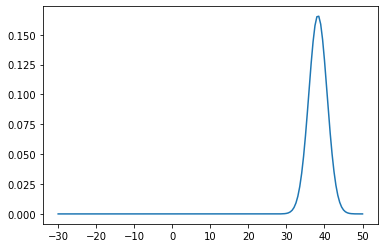

In [72]:
plt.plot(x_range, posterior)


In [73]:
auc(x_range, posterior)

0.9999997243609348

In [74]:
print(np.max(posterior))
print(x_range[np.argmax(posterior)])

0.165529083662348
38.5


## Exercise 2: Temperature measurement through prankster friend

Compute the quantized posterior assuming the your friend tells you that the value is 42 degress. Compare it with the prior.
Because our friend might tell us it's 42 degrees 0.5 of the times, our error distribution $p(h |T)$ changes. We have to consider the fact that it might actually be 42, but also that he might be pranking, so the error moves to the right.


prior: $P(T) = \mathcal{N}(T; 37^o, (4^o)^2) $  
evidence: $p(h) \approx \sum_m p(h | T)p(T)\Delta t$  
reading error distribution: $ p(h | T) = 0.5 * \mathcal{N}(ah; T, 1\text{mm}^2) + 0.5 * \delta(ah, 42)$  

In [75]:
def delta(x):
    return np.array(x == 42, dtype=int)


d_t = 0.5
t_range = np.arange(-30, 50.5, d_t)

prior = pdf(t_range, 37, 4)
likelihood = 0.5*pdf(42, t_range, 1*3) + 0.5*delta(42) # likelihood that the reading is correct
evidence = np.sum(likelihood * prior * d_t)
evidence

0.5239673528387965

Calculate the posterior $ p(T | h ) = \dfrac{p(h | T) p(T)}{p(h)}$  


0.9994144053839443

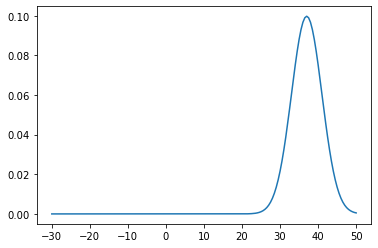

In [76]:
posterior = evidence * prior / evidence
plt.plot(t_range, posterior)
auc(t_range, posterior)

Compute the quantized posterior if your friend gives you a reading of 13 mm = 39 deg. Compare with the posterior obtained from the previous exercise.  
Discuss the result

1.0

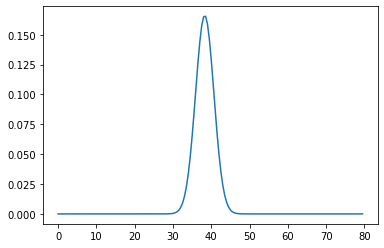

In [77]:
#d_t = 0.05
#z_range = np.arange(0, 75, d_t)
#likelihood = gaussian_pdf(13*3, z_range, 1*3) * 0.5 + delta_42(13*3) * 0.5
#prior = gaussian_pdf(z_range, 37, 4)
#posterior = likelihood * prior / evidence

d_t = 0.5
t_range = np.arange(0, 80, d_t)
prior = pdf(t_range, 37, 4)
likelihood = 0.5*pdf(3*13, t_range, 3) + 0.5*(delta(13*3)) # likelihood that the reading is correct
evidence = np.sum(likelihood * prior * d_t) 
posterior = likelihood * prior / evidence
plt.plot(t_range, posterior)
auc(t_range, posterior)

In [78]:
t_range[np.argmax(posterior)]

38.5

In [79]:
np.max(posterior)

0.1655290353374393

## 